# Data Visualization

In [1073]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1074]:
#import all required libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [1075]:
#Reading data from csv file using pandas
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1076]:
#checking the dimensions
bike.shape

(730, 16)

In [1077]:
# describing the columns of dataframe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1078]:
#checking the info about the columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1079]:
#dropping the columns which has all non-alpha values
bike.dropna(axis = 1, how = 'all', inplace = True)
bike.shape

(730, 16)

In [1080]:
#checking unique values across variables
cols_unique = bike.nunique()
print(cols_unique)

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


OBSERVATION:
- There are no columns that have only single value. Hence, there is no case of removing single valued columns.
- instant has only index values for the row, which is irrelevant for the study, dteday has date which is not required as the data set already has year and month columns.
- casual and registered seems to define the category which is irrelevant for this study as we need to focus on cnt column

- Let us drop the unwanted columns.

In [1081]:
#dropping the unwanted columns
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [1082]:
#verify if the columns are dropped
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [1083]:
#Let's do encoding/mapping of 'season' column as per data dictionary
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [1084]:
#Let's do encoding/mapping of 'mnth' column. As per data dictionary, the holiday column points to data being referred from
# district of Columbia, United States, which considers Sunday as the first day of the week.
bike.mnth = bike.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [1085]:
#Let's do encoding/mapping of 'weekday' column as per data dictionary
bike.weekday = bike.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

In [1086]:
#Let's do encoding/mapping of 'weathersit' column as per data dictionary
bike.weathersit = bike.weathersit.map({1:'Clear', 2:'Misty', 3:'Light_SnowRain', 4:'Heavy_SnowRain'})

In [1087]:
#check the head of the dataset and the affected changes
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1088]:
# check the column info of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


- Let us analyse/visualize all the 'categorical' columns one by one in order to see how predictor variable stands against the target variable


#### Analysing 'season'

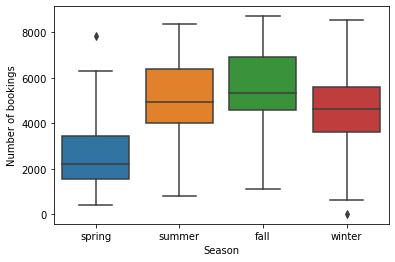

In [1089]:
sns.boxplot(x='season', y='cnt', data=bike)
plt.xlabel('Season')
plt.ylabel('Number of bookings')
plt.show()

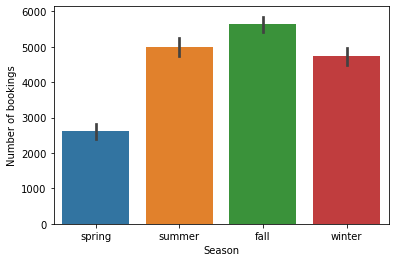

In [1090]:
sns.barplot(x='season', y='cnt', data=bike)
plt.xlabel('Season')
plt.ylabel('Number of bookings')
plt.show()

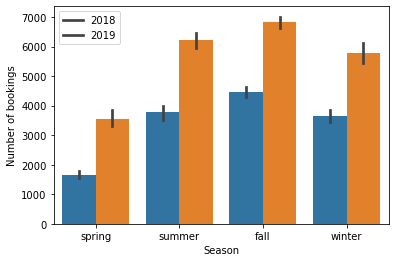

In [1091]:
sns.barplot(x='season', y='cnt', data=bike, hue='yr')
plt.xlabel('Season')
plt.ylabel('Number of bookings')
plt.legend(labels=['2018', '2019'])
plt.show()

OBSERVATION
- It appears that Fall season has attracted highest number of bookings with a median of over 5000. Also, in each of the seasons, the number of bookings has increased considerably from 2018 to 2019.
- Fall is followed by Summer and Spring seasons attracting bookings for the period of 2 years. This indicates that, season can be a good predictor for the dependent variable.

#### Analysing 'mnth'

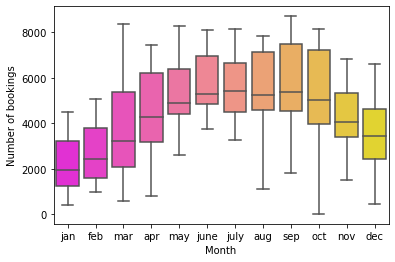

In [1092]:
sns.boxplot(x='mnth', y='cnt', data=bike, palette='spring')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.show()

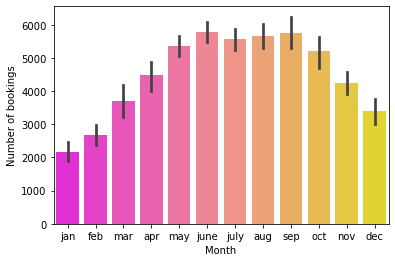

In [1093]:
sns.barplot(x='mnth', y='cnt', data=bike, palette='spring')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.show()

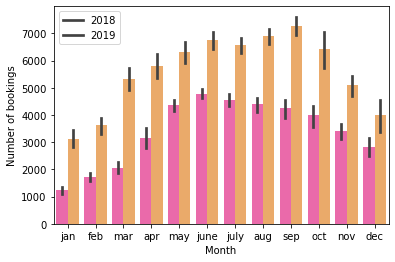

In [1094]:
sns.barplot(x='mnth', y='cnt', data=bike, hue='yr', palette='spring')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.legend(labels=['2018', '2019'])
plt.show()

OBSERVATION:
- Majority of the bookings have been made in the month of June, July, August, September and October with a median of over 4000. The trend increased at the beginning of the year until the mid of the year and then it decreased continuously until the end of the year.
- This indicates that month has some trend for bookings and can be a good predictor for the dependent variable.

#### Analysing 'weathersit'

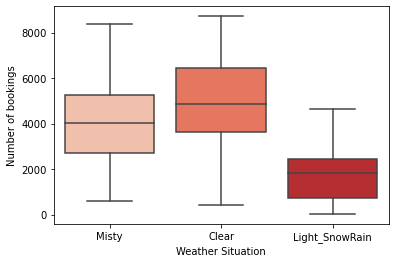

In [1095]:
sns.boxplot(x='weathersit', y='cnt', data=bike, palette='Reds')
plt.xlabel('Weather Situation')
plt.ylabel('Number of bookings')
plt.show()

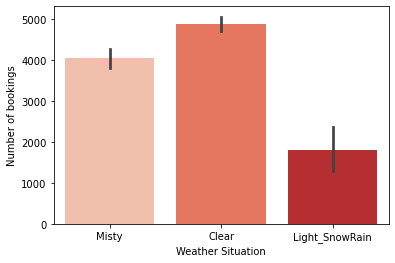

In [1096]:
sns.barplot(x='weathersit', y='cnt', data=bike, palette='Reds')
plt.xlabel('Weather Situation')
plt.ylabel('Number of bookings')
plt.show()

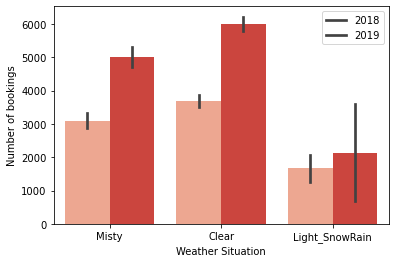

In [1097]:
sns.barplot(x='weathersit', y='cnt', data=bike, hue='yr', palette='Reds')
plt.xlabel('Weather Situation')
plt.ylabel('Number of bookings')
plt.legend(labels=['2018', '2019'])
plt.show()

OBSERVATION:
- Clear weather attracted more bookings with a median over close to 5000. 
- This was followed by Misty season.
- And, in comparison to previous year, i.e. 2018, booking increased for each weather situation in 2019.
- This indicates, weather situation does show some trend towards the bike bookings and hence can be a good predictor for the dependent variable.

#### Analysing 'weekday'

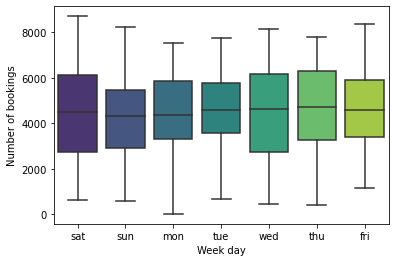

In [1098]:
sns.boxplot(x='weekday', y='cnt', data=bike, palette='viridis')
plt.xlabel('Week day')
plt.ylabel('Number of bookings')
plt.show()

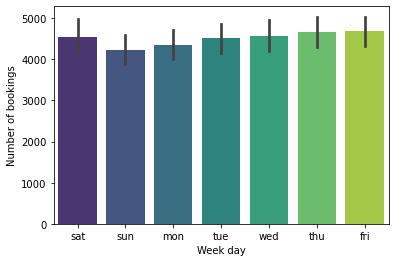

In [1099]:
sns.barplot(x='weekday', y='cnt', data=bike, palette='viridis')
plt.xlabel('Week day')
plt.ylabel('Number of bookings')
plt.show()

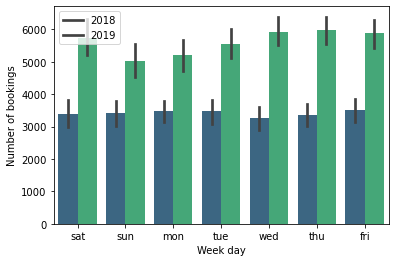

In [1100]:
sns.barplot(x='weekday', y='cnt', data=bike, hue='yr', palette='viridis')
plt.xlabel('Week day')
plt.ylabel('Number of bookings')
plt.legend(labels=['2018', '2019'])
plt.show()

OBSERVATION:
- Wednesday, Thursday, Friday, Saturday have more number of bookings.
- Bookings on Sunday is the least which implies that people like to spend time on Sundays with friends and family.
- It is to be also noted that, weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This indicates, weekday variable can have some or no influence towards the predictor. The model would decide if this needs to be added or not.

#### Analysing 'holiday'

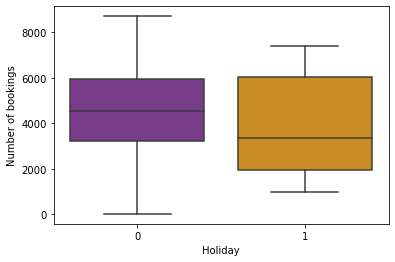

In [1101]:
sns.boxplot(x='holiday', y='cnt', data=bike, palette="CMRmap")
plt.xlabel('Holiday')
plt.ylabel('Number of bookings')
plt.show()

In [1102]:
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

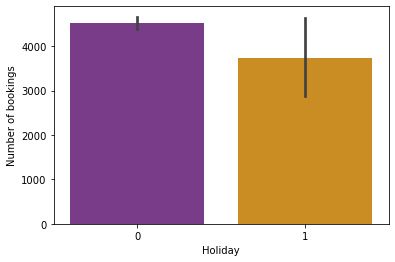

In [1103]:
sns.barplot(x='holiday', y='cnt', data=bike, palette="CMRmap")
plt.xlabel('Holiday')
plt.ylabel('Number of bookings')
plt.show()

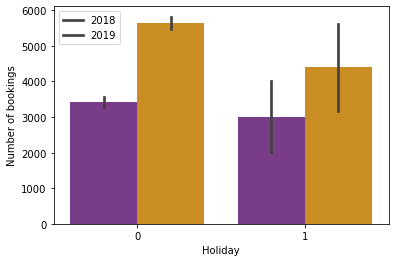

In [1104]:
sns.barplot(x='holiday', y='cnt', data=bike, hue='yr', palette="CMRmap")
plt.xlabel('Holiday')
plt.ylabel('Number of bookings')
plt.legend(labels=['2018', '2019'])
plt.show()

OBSERVATION:
- When it is not a holiday, booking seems to be more in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.
- As we can see in the above bar plot, 97 percent of the bike bookings were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

#### Analysing 'workingday'

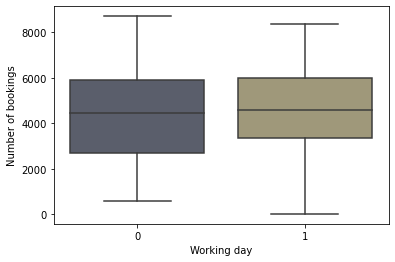

In [1105]:
sns.boxplot(x='workingday', y='cnt', data=bike, palette="cividis")
plt.xlabel('Working day')
plt.ylabel('Number of bookings')
plt.show()

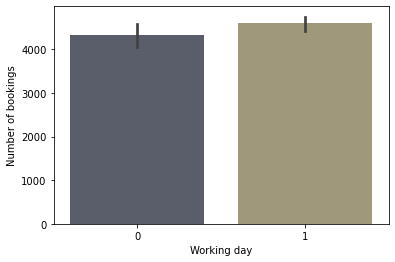

In [1106]:
sns.barplot(x='workingday', y='cnt', data=bike, palette="cividis")
plt.xlabel('Working day')
plt.ylabel('Number of bookings')
plt.show()

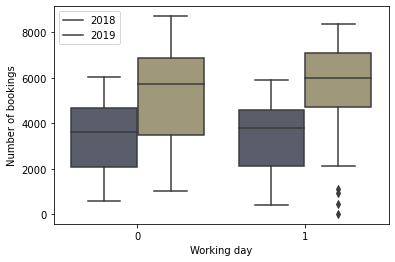

In [1107]:
sns.boxplot(x='workingday', y='cnt', data=bike, hue='yr', palette="cividis")
plt.xlabel('Working day')
plt.ylabel('Number of bookings')
plt.legend(labels=['2018', '2019'])
plt.show()

OBSERVATION:
- Bookings seemed to be happening more in working day (almost two-thirds) with a median of close to 5000, which indicates, workingday can be a good predictor for the dependent variable.

#### Analysing 'yr'

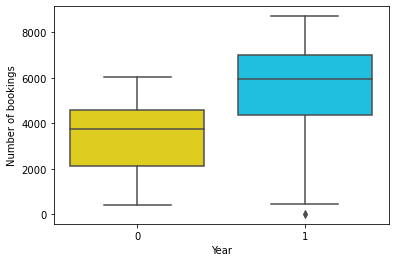

In [1108]:
sns.boxplot(x='yr', y='cnt', data=bike, palette="jet_r")
plt.xlabel('Year')
plt.ylabel('Number of bookings')
plt.show()

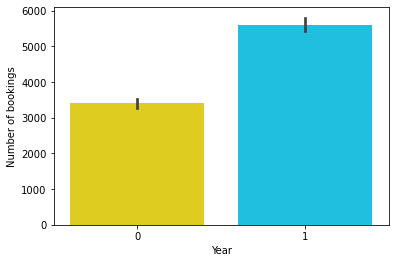

In [1109]:
sns.barplot(x='yr', y='cnt', data=bike, palette="jet_r")
plt.xlabel('Year')
plt.ylabel('Number of bookings')
plt.show()

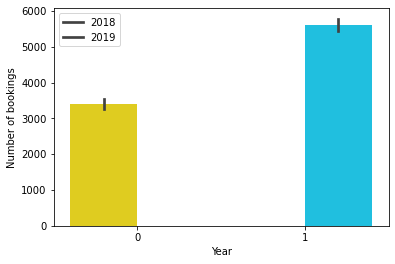

In [1110]:
sns.barplot(x='yr', y='cnt', data=bike, hue='yr', palette="jet_r")
plt.xlabel('Year')
plt.ylabel('Number of bookings')
plt.legend(labels=['2018', '2019'])
plt.show()

OBSERVATION:
- 2019 attracted more number of bookings from the previous year, which shows good progress in terms of business.

Let us now analyse/visualize all the 'numerical' columns one by one in order to see how predictor variable stands against the target variable.


#### Analysing numerical variables

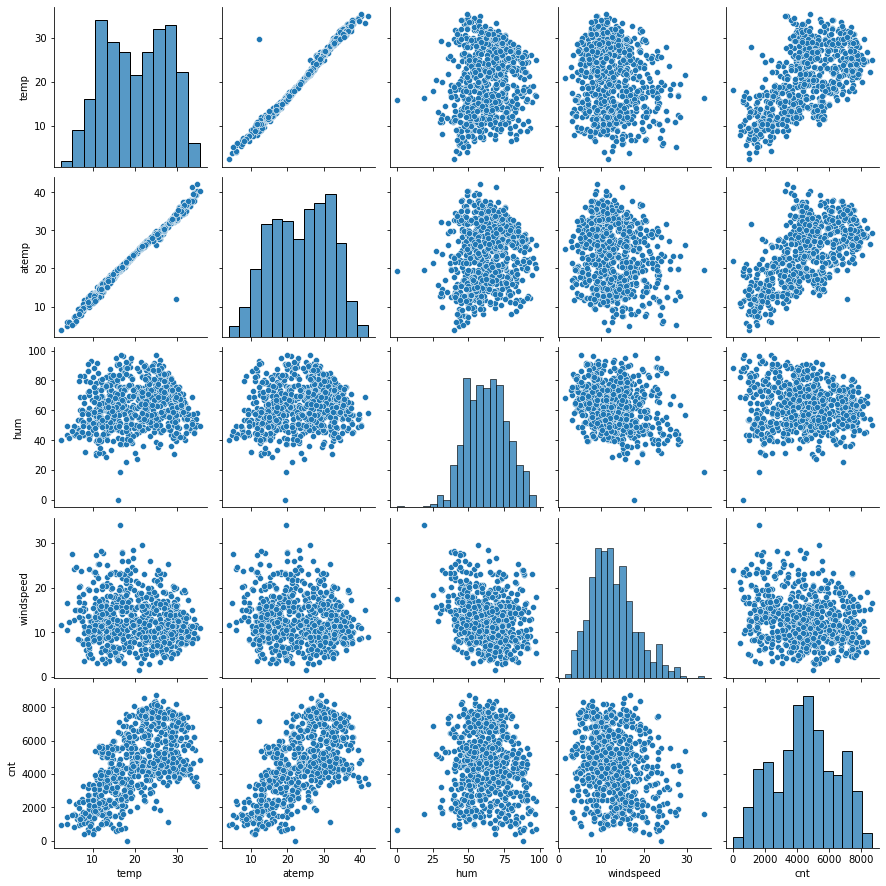

In [1111]:
sns.pairplot(data=bike, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

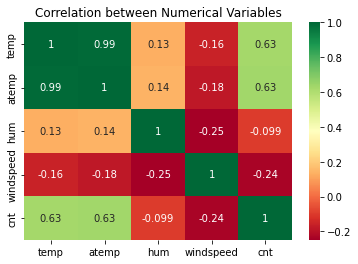

In [1112]:
# Let us check the correlation between the numerical variables
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

OBSERVATION:
- There is linear relationship between temp and atemp.
- We need to decide which parameters to keep based on VIF and p-value w.r.t. other variables.

# Data Preparation

In [1113]:
#Let us create dummy variables for month, weekday, weathersit and season variables.
months_bike=pd.get_dummies(bike.mnth,drop_first=True)
weekdays_bike=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_bike=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_bike=pd.get_dummies(bike.season,drop_first=True)

In [1114]:
#Let us now merge the bike dataset, with the dummy variable dataset. 
bike_new = pd.concat([bike, months_bike, weekdays_bike, weathersit_bike, seasons_bike], axis=1)

In [1115]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [1116]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [1117]:
# Let us drop unnecessary variables as we have already created dummy variables out of them.
bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [1118]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [1119]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

In [1120]:
# splitting the dataset into Train and Test

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [1121]:
# check the shape of training datatset
bike_train.shape

(510, 30)

In [1122]:
# check the shape of test datatset
bike_test.shape

(220, 30)

In [1123]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [1124]:
# As we can clearly see that the values of the numerical variables are at a different scale.
# Hence, we need to scale them.
# Using MinMaxScaler to Rescale the features
scaler = MinMaxScaler()

In [1125]:
# Apply scaler() to all the variables except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [1126]:
# verifying the head after appying scaling.
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [1127]:
# describing the training dataset
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


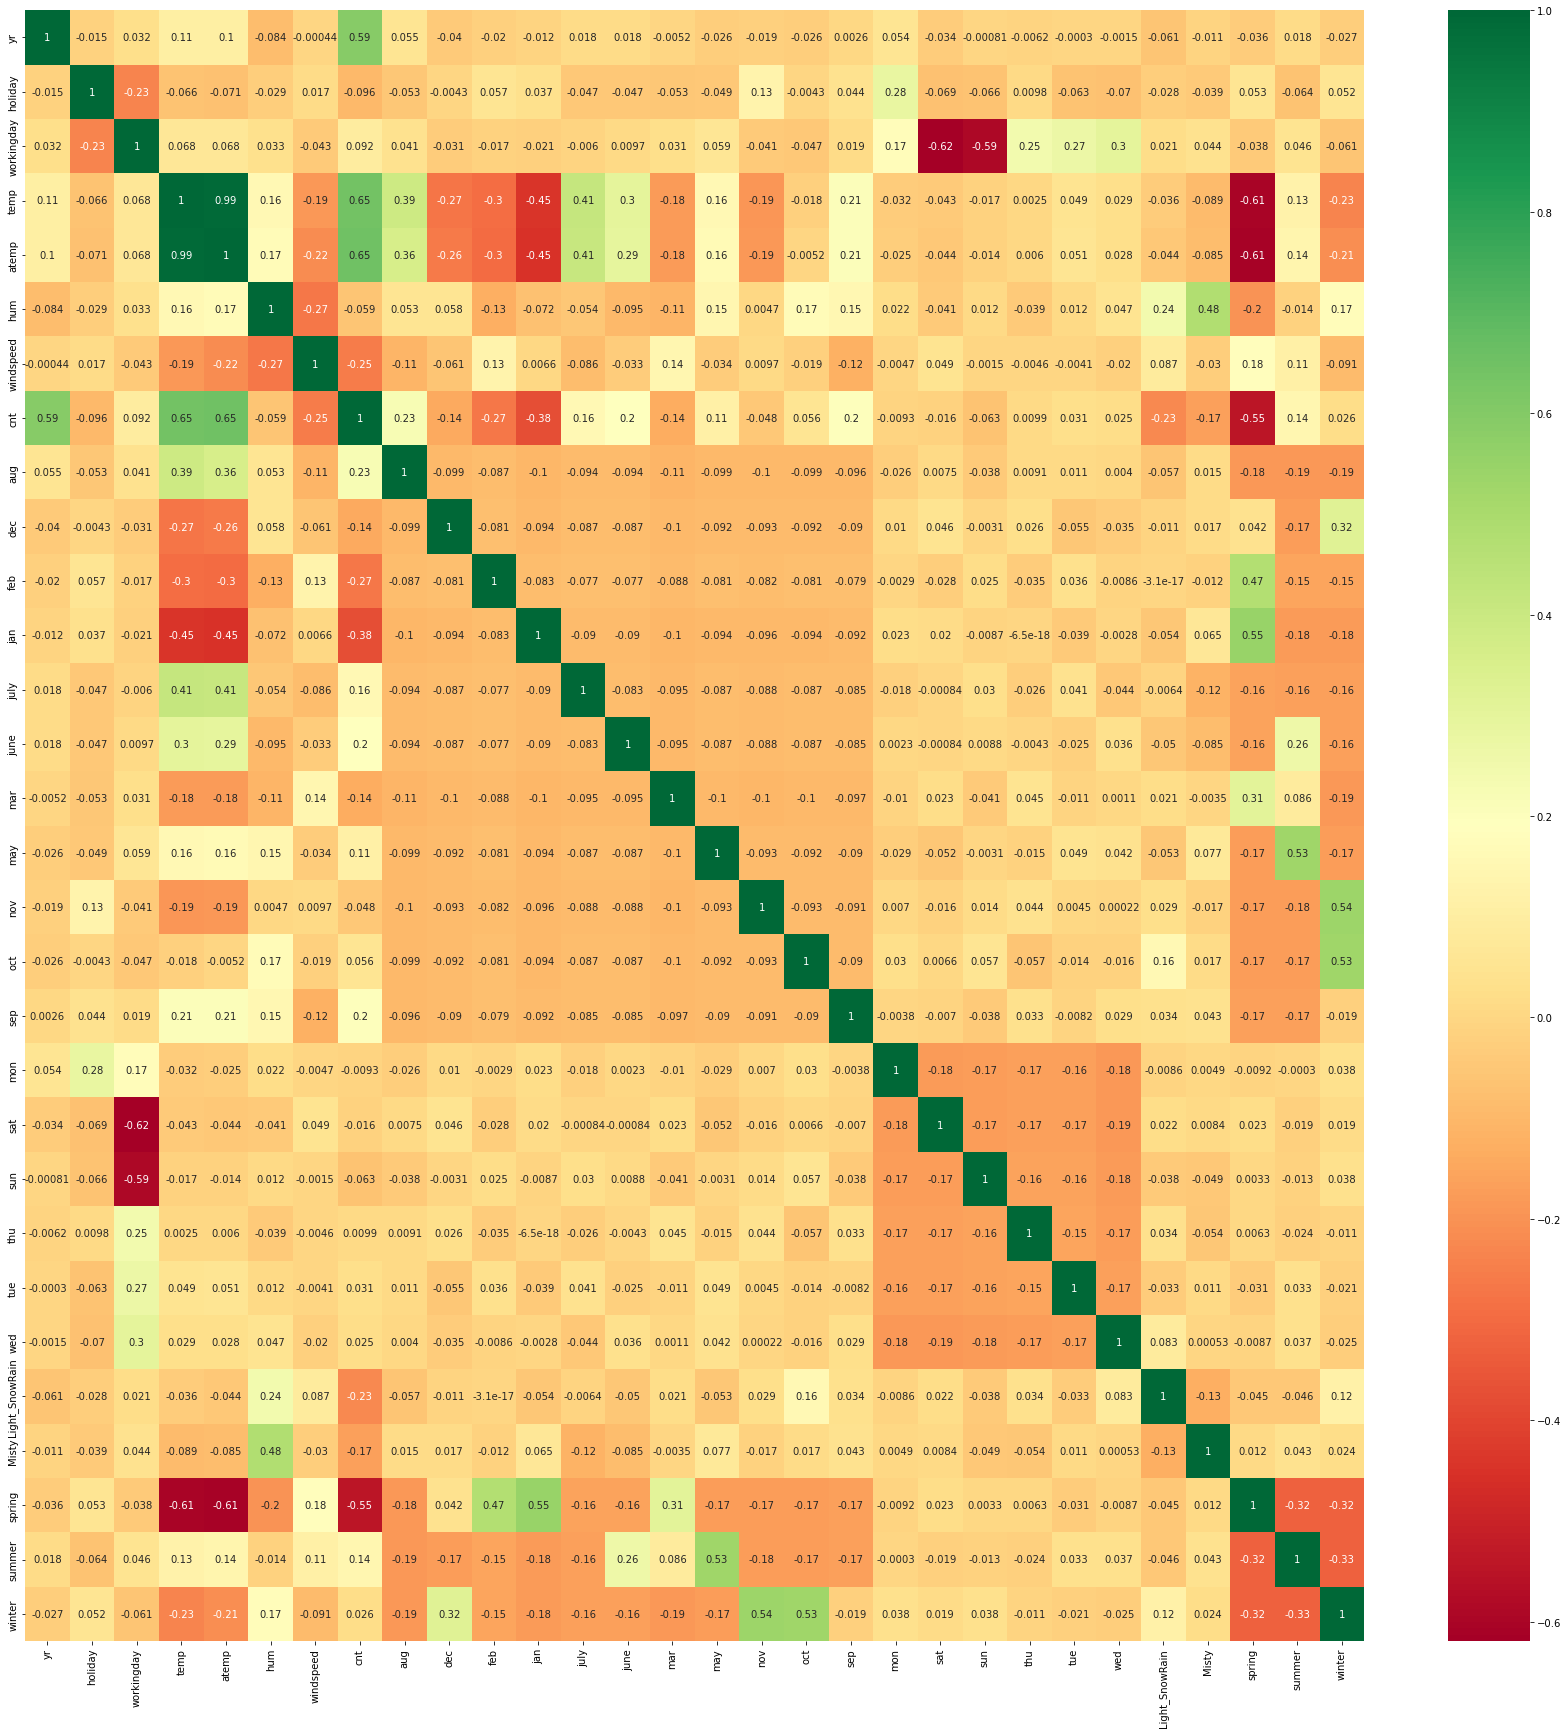

In [1128]:
# Let us check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30,30))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

OBSERVATION:
- cnt has correlation with year and temp variables.
- Misty has correlation with humidity
- Spring season has correlation with January and February months.
- Summer season has correlation with May month
- Winter season has correlation with October and November months.

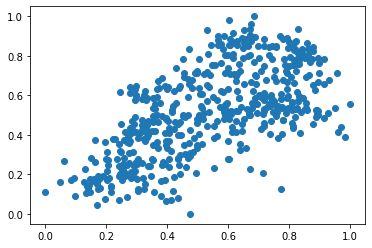

In [1129]:
# Let us visualize the correlation between temp and cnt to see the trends via Scatter plot
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

OBSERVATION:
- The above visualation confirms that there is a positive correlation between 'temp' and 'cnt'.

# Build Linear Regression Model using mixed approach (RFE & VIF/p-value)

In [1130]:
#Let us build the Linear Model
# Dividing into X and Y sets for the model building
y_train = bike_train.pop('cnt')
X_train = bike_train

In [1131]:
#Recursive feature elimination: We will be using the LinearRegression from Scikit Learn for its compatibility with RFE.
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [1132]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_SnowRain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [1133]:
# Let us select the identified variables via RFE in col list based on the ranking.
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_SnowRain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [1134]:
# Let us check which columns have been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [1135]:
# Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [1136]:
# dataframe with selected variables via RFE
X_train_rfe = X_train[col]

In [1137]:
# Let us calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.98


OBSERVATION:
- Humidity shows high VIF value.

# Building Linear Model using statsmodel

In [1138]:
# Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.22e-191
Time:                        23:00:57   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [1139]:
# As humidity shows high VIF value, let us drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [1140]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.60e-188
Time:                        23:00:57   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

Note: Even though temp p-value more than 5, we are not going to drop it as we have seen earlier that temp is highly correlated to number of bookings and act as good predictor.

In [1141]:
#Dropping holiday as it has high p-value and we have seen earlier in our EDA that it is not a good predictor.
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,yr,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,july,1.59


In [1142]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          8.68e-189
Time:                        23:00:57   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

In [1143]:
# As jan shows high p-value, let us drop it
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,yr,2.07
11,winter,1.91
6,sat,1.83
4,july,1.58
8,Misty,1.57


In [1144]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          7.12e-189
Time:                        23:00:57   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

In [1145]:
# As july shows high p-value, let us drop it
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,yr,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Misty,1.57
4,sep,1.23


In [1146]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.42e-188
Time:                        23:00:57   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

In [1147]:
# As spring shows high p value, let us drop it
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_SnowRain,1.08


In [1148]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.13e-188
Time:                        23:00:57   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.

OBSERVATION:
- This model looks good, since there seems to be VERY LOW multicollinearity between the predictors. Also, the p-values for all the predictors seems to be significant. For now, we will consider this as our final model unless the test data metrics are not significantly close to this number.
- F Statistics: F-statistics is used for testing the overall significance of the model. Higher the F-statistics, more significant the model is.
** F-statistic: 253.0
** Prob(F-statistic): 3.13e-188
- The F-statistics value of 253(which is greater than 1) and the p-value of '~0' states that the overall model is significant.

The equation of the best fitted surface surface based on the model lr_6:
- cnt = 0.075 + (0.2331 $\times$ yr) + (0.0561 $\times$ workingday) + (0.5499 $\times$ temp) - (0.1552 $\times$ windspeed) + (0.0974 $\times$ sep) + (0.0675 $\times$ sat) - (0.2871 $\times$ Light_SnowRain) - (0.08 $\times$ Misty) + (0.0886 $\times$ summer) + (0.1307 $\times$ winter)

# Validate Assumptions

##### Error terms are normally distributed with mean zero (not X, Y)

In [1149]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

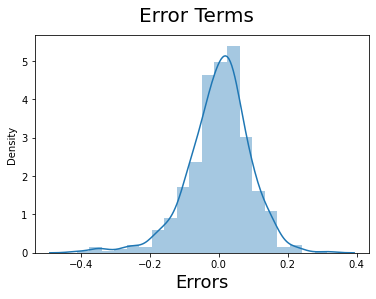

In [1150]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

OBSERVATION:
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

##### There is a linear relationship between X and Y

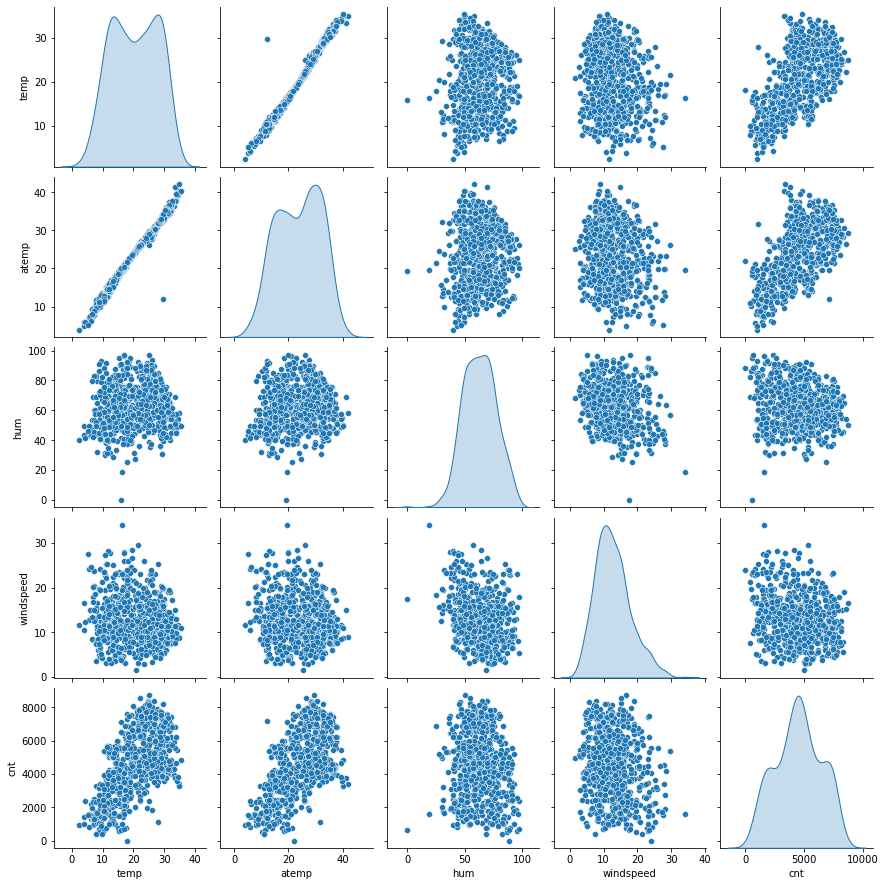

In [1151]:
bike_num=bike_new[num_vars]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

Using the pair plot, we could see that there is a linear relation between 'temp' variable with the predictor ‘cnt’.

##### There is no Multicollinearity between the predictor variables

In [1152]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_SnowRain,1.08


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

##### Homoscedasticity

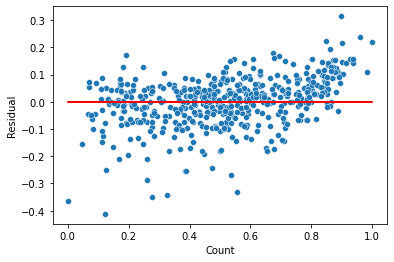

In [1153]:
sns.scatterplot(y_train, res)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

# Making prediction using final model

In [1154]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [1155]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [1156]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1157]:
# Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   atemp           220 non-null    float64
 5   hum             220 non-null    float64
 6   windspeed       220 non-null    float64
 7   aug             220 non-null    uint8  
 8   dec             220 non-null    uint8  
 9   feb             220 non-null    uint8  
 10  jan             220 non-null    uint8  
 11  july            220 non-null    uint8  
 12  june            220 non-null    uint8  
 13  mar             220 non-null    uint8  
 14  may             220 non-null    uint8  
 15  nov             220 non-null    uint8  
 16  oct             220 non-null    uint8  
 17  sep             220 non-null    u

In [1158]:
#Selecting the variables that were part of final model.
train_cols=X_train_new.columns

X_test=X_test[train_cols]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

X_test_lm_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   windspeed       220 non-null    float64
 5   sep             220 non-null    uint8  
 6   sat             220 non-null    uint8  
 7   Light_SnowRain  220 non-null    uint8  
 8   Misty           220 non-null    uint8  
 9   summer          220 non-null    uint8  
 10  winter          220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [1159]:
# Making predictions using the final model (lr_6)

y_pred = lr_6.predict(X_test_lm_6)

# Model Evaluation

Text(0, 0.5, 'y_pred')

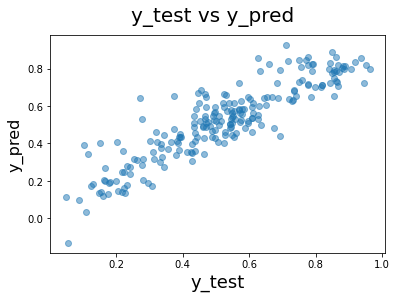

In [1160]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [1161]:
#R^2 Value for TEST
r2 = r2_score(y_test, y_pred)
round(r2, 3)

0.796

In [1162]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(round(adjusted_r2, 3))


0.786


FINAL RESULT COMPARISON:
- Train R^2: 0.835, Train Adjusted-R^2: 0.832 
- Test R^2: 0.796, Test Adjusted-R^2: 0.786
- This seems to be a really good model that can very well generalize various datasets.

FINAL REPORT:
- Demand of bikes depend majorly on the following factors/variables: Year, Working day, Temperature, Wind speed, September month, Saturday, Light Snow or rain, Misty, Summer and Winter